<a href="https://colab.research.google.com/github/JuanBarbosa277/Proyecto-Final-IA/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación por SVM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
 
data_set = pd.read_csv("citrus.csv")
 
 
 
 
Y_total = data_set.values[:,0];
 
 

Y_total[Y_total[:] == 'orange'] = 1
Y_total[Y_total[:] == 'grapefruit'] = 0
 
Y_total=Y_total.astype('int')
 
 
X_total = data_set.values[:, 1:5]
 
#Partición de datos --> 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.3, random_state=0)
 
#escalización de datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

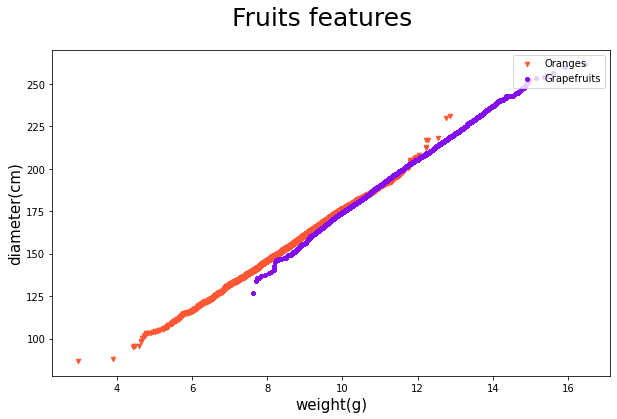

In [7]:
from sklearn.metrics import roc_curve,roc_auc_score  
oranges_d=[]
oranges_w=[]

gfruits_d=[]
gfruits_w=[]
 
for i in np.arange(0,Y_total.size,1):
    if Y_total[i]==1:
        oranges_d.append(X_total[i,0])
        oranges_w.append(X_total[i,1])
    else:
        gfruits_d.append(X_total[i,0])
        gfruits_w.append(X_total[i,1])
         
fig = plt.figure(figsize=(10,6))
fig.suptitle('Fruits features', fontsize=25)
ax = fig.add_subplot(111)

no_of_preds = len(oranges_d) + len(gfruits_d)

ax.scatter(oranges_d,oranges_w, s=20, c='#FF5733', marker="v", label='Oranges')
ax.scatter(gfruits_d,gfruits_w, s=20, c='#830CF3', marker="P", label='Grapefruits')

  
plt.legend(loc='upper right');
  
ax.set_xlabel('weight(g)', fontsize=15)
ax.set_ylabel('diameter(cm)', fontsize=15)
  
plt.show()

matthews_corrcoef 0.9099816393789927
Accuracy 0.954


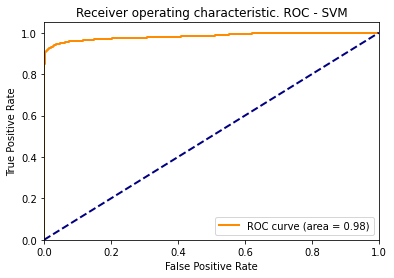

[[1469   20]
 [ 118 1393]]


In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
msv = svm.SVC(kernel='linear')


msv.fit(X_train, y_train)

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)



MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC - SVM')
plt.legend(loc="lower right")
plt.show()
print(confusion_matrix(y_test, y_test_predicted))